In [536]:


import os
import pandas as pd
import numpy as np

In [537]:
file = [file for file in os.listdir("./data")]
dataSet = pd.DataFrame()

for files in file:
    if(os.path.exists("./data/"+files)):
        singleData = pd.read_csv("./data/"+files)
        dataSet = pd.concat([dataSet,singleData])
           
    else:
        print("no")

In [538]:
dataSet

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
...,...,...,...,...,...,...
11681,259353,AAA Batteries (4-pack),3,2.99,09/17/19 20:56,"840 Highland St, Los Angeles, CA 90001"
11682,259354,iPhone,1,700,09/01/19 16:00,"216 Dogwood St, San Francisco, CA 94016"
11683,259355,iPhone,1,700,09/23/19 07:39,"220 12th St, San Francisco, CA 94016"
11684,259356,34in Ultrawide Monitor,1,379.99,09/19/19 17:30,"511 Forest St, San Francisco, CA 94016"


In [539]:
dataSet.dropna(inplace=True)

#### Month column



In [540]:
dataSet["Month"]= dataSet["Order Date"].str[0:2]

In [541]:
dataSet.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",04
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",04
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",04
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",04
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",04


#####  Questions to solve
- What was the best month for sales? How much was earned that month?

- What city sold the most product?
- What time should we display advertisemens to maximize the likelihood of customer’s buying product?
- What products are most often sold together?
- What product sold the most? Why do you think it sold the most?

##### Adding time related columns


In [542]:
dataSet["Hours"]= dataSet["Order Date"].str[9:11:1]

In [543]:
dataSet.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Hours
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",04,08
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",04,22
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",04,14
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",04,14
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",04,09


In [544]:
dataSet["Minutes"] = dataSet["Order Date"].str[12:14:1]

In [545]:
dataSet.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Hours,Minutes
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",04,08,46
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",04,22,30
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",04,14,38
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",04,14,38
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",04,09,27


In [546]:

dataSet = dataSet.drop(dataSet[dataSet["Price Each"]=="Price Each" ].index,axis=0)


In [547]:
dataSet["Price Each"] = pd.to_numeric(dataSet["Price Each"])
dataSet["Quantity Ordered"] = pd.to_numeric(dataSet["Quantity Ordered"])


#### Adding Sales Column


In [548]:
dataSales = dataSet.groupby("Product").agg(
    Sales = pd.NamedAgg(column="Price Each",aggfunc="sum")
) #for just checking

In [549]:
dataSet["Sales"]=dataSet["Quantity Ordered"]*dataSet["Price Each"]

### Total  Sales on Each Product


In [550]:
dataSales

,Sales
Product,
20in Monitor,443479.68
27in 4K Gaming Monitor,2387518.78
27in FHD Monitor,1107826.14
34in Ultrawide Monitor,2301979.42
AA Batteries (4-pack),77621.76
AAA Batteries (4-pack),60676.07
Apple Airpods Headphones,2290950.00
Bose SoundSport Headphones,1310768.91
Flatscreen TV,1411500.00


#### Sales Per Order

In [551]:
dataSet["Sales"]

0         23.90
2         99.99
3        600.00
4         11.99
5         11.99
          ...  
11681      8.97
11682    700.00
11683    700.00
11684    379.99
11685     11.95
Name: Sales, Length: 182735, dtype: float64

## Best Month


In [552]:
monthComparison = dataSet.groupby("Month").agg(
    Sales = pd.NamedAgg(column="Sales",aggfunc='sum')
)

In [553]:
monthComparison

,Sales
Month,
01,1786511.29
02,2158127.48
03,2755969.40
04,3336376.42
05,3101881.04
06,2524464.99
07,2587444.91
08,2191698.31
09,2050361.26


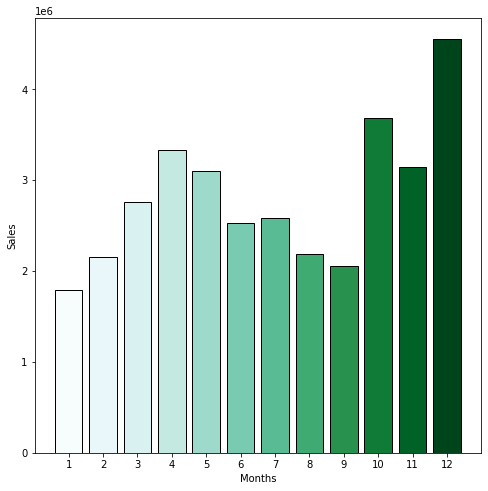

In [554]:
import matplotlib.pyplot as plt
figure,ax = plt.subplots(1,1,figsize=(8,8))

months = range(1,13)
cmap = plt.cm.get_cmap("BuGn")
normalize = plt.Normalize(min(months),max(months))
colors = [cmap(normalize(value)) for value in months]

ax = plt.bar(months,monthComparison.Sales,color=colors,edgecolor="black",fill=True)
plt.xticks(months)
plt.xlabel("Months")
plt.ylabel("Sales")
plt.show()


In [555]:
dataSet.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Hours,Minutes,Sales
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",04,08,46,23.90
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",04,22,30,99.99
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",04,14,38,600.00
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",04,14,38,11.99
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",04,09,27,11.99


#### Creating Cities Column


In [556]:
dataSet["City"]= dataSet["Purchase Address"].str.split(',').map(lambda x:x[1]+" "+x[2].split(" ")[1])


##### City where mostly Sold

In [557]:
City_Sales = dataSet.groupby("City").agg(
    Sales = pd.NamedAgg(column="Sales",aggfunc="sum"),
)


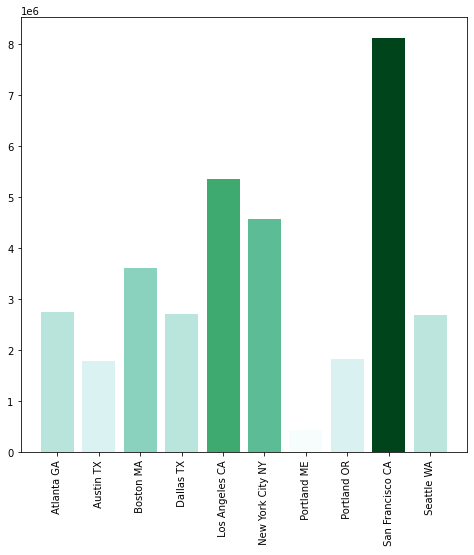

In [558]:
fig,plot = plt.subplots(1,1,figsize=(8,8))
cmap = plt.cm.get_cmap("BuGn")#select color map from cm.get_cmap
#for distribution of colors
values = City_Sales.Sales

#normalize between 0 and 1
normalize = plt.Normalize(min(values),max(values))

#create color list
colors = [cmap(normalize(value)) for value in values]

plot = plt.bar(City_Sales.index,City_Sales.Sales,color=colors)
plt.xticks(rotation=90)
# plot.legend(*plot.legend_elements(),title="Sales")
plt.show()

### Best Time for Ads


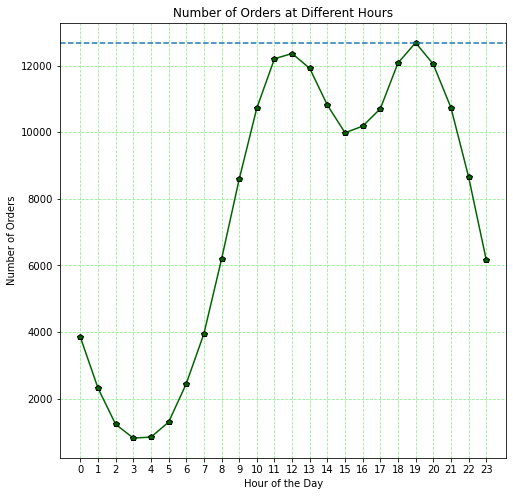

In [559]:

fig,ax = plt.subplots(1,1,figsize=(8,8))
# Assuming 'Hours' is the column in your DataFrame representing the hours
dataSet['Hours'] = pd.to_numeric(dataSet['Hours'], errors='coerce').astype('Int64')

# Assuming you want to count the number of orders at each hour
hourly_counts = dataSet['Hours'].value_counts().sort_index()
hours=range(0,24)
# Plotting
ax.plot(hourly_counts.index, hourly_counts.values,color="darkgreen",marker='p',mec="black")
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Orders')
plt.title('Number of Orders at Different Hours')
plt.xticks(hours)
plt.grid(color="lightgreen",linestyle="--", fillstyle="full",)
plt.axhline(max(hourly_counts.values),linestyle="--")
plt.show()


### Most Often Sold Together (Products)

In [560]:
df = dataSet[dataSet["Order ID"].duplicated(keep=False)]

# Assuming 'Product' is the column containing product names

df["Grouped"] = df.groupby("Order ID")["Product"].transform(lambda x:','.join(x))
df = df[["Order ID","Grouped"]].drop_duplicates()


df.head()


C:\Users\HP\AppData\Local\Temp\ipykernel_20048\3174426415.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Grouped"] = df.groupby("Order ID")["Product"].transform(lambda x:','.join(x))


,Order ID,Grouped
3,176560,"Google Phone,Wired Headphones"
18,176574,"Google Phone,USB-C Charging Cable"
30,176585,"Bose SoundSport Headphones,Bose SoundSport Hea..."
32,176586,"AAA Batteries (4-pack),Google Phone"
119,176672,"Lightning Charging Cable,USB-C Charging Cable"


In [561]:
from itertools import combinations
from collections import Counter

count = Counter()
for row in df["Grouped"]:
    row_list = row.split(",")
    count.update(Counter(combinations(row_list,2)))
for key, value in count.most_common():
    print(key,value)

('iPhone', 'Lightning Charging Cable') 973
('Google Phone', 'USB-C Charging Cable') 954
('iPhone', 'Wired Headphones') 437
('Google Phone', 'Wired Headphones') 401
('Vareebadd Phone', 'USB-C Charging Cable') 348
('iPhone', 'Apple Airpods Headphones') 343
('Google Phone', 'Bose SoundSport Headphones') 219
('USB-C Charging Cable', 'Wired Headphones') 156
('Vareebadd Phone', 'Wired Headphones') 141
('Lightning Charging Cable', 'Wired Headphones') 92
('USB-C Charging Cable', 'Bose SoundSport Headphones') 76
('Lightning Charging Cable', 'Apple Airpods Headphones') 76
('Vareebadd Phone', 'Bose SoundSport Headphones') 74
('Apple Airpods Headphones', 'Wired Headphones') 69
('Lightning Charging Cable', 'USB-C Charging Cable') 58
('Lightning Charging Cable', 'AA Batteries (4-pack)') 53
('Lightning Charging Cable', 'Lightning Charging Cable') 53
('Bose SoundSport Headphones', 'Wired Headphones') 51
('AA Batteries (4-pack)', 'Lightning Charging Cable') 49
('AAA Batteries (4-pack)', 'USB-C Charging

### What product selled the most

In [562]:
GroupProduct = dataSet.groupby("Product")#simply grouped product with quantity
quantity_order = GroupProduct.sum()["Quantity Ordered"]
products = [product for product,df in GroupProduct]

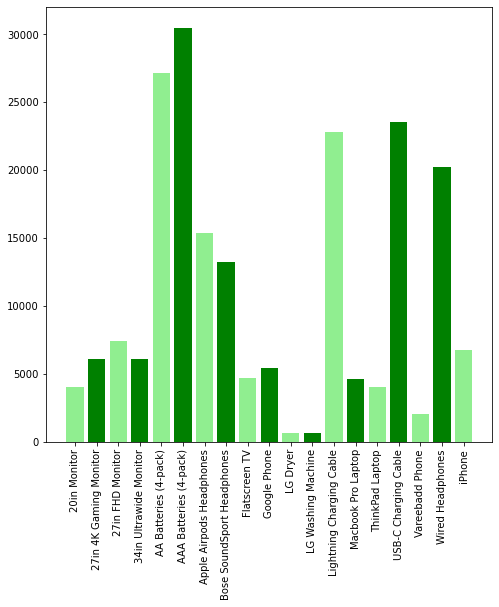

In [563]:
fig,ax = plt.subplots(1,1,figsize=(8,8))
values = quantity_order


ax = plt.bar(products,quantity_order ,color=["lightgreen","green"])
plt.xticks(rotation=90)
plt.show()

C:\Users\HP\AppData\Local\Temp\ipykernel_20048\1629496378.py:11: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(products,rotation=90)


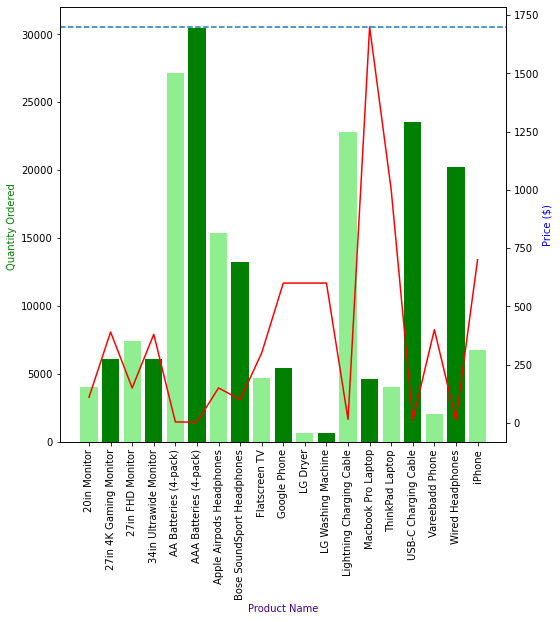

In [564]:
Price_Each = dataSet.groupby("Product").agg(
    PE = pd.NamedAgg("Price Each",aggfunc="mean")
)
fig,ax1 = plt.subplots(1,1,figsize=(8,8))

ax2=ax1.twinx()#to plot on a same fig

ax1.bar(products,quantity_order ,color=["lightgreen","green"])
ax2.plot(products,Price_Each.PE,color="red")

ax1.set_xticklabels(products,rotation=90)
ax1.set_xlabel("Product Name",color="indigo")
ax1.set_ylabel("Quantity Ordered ",color="g")
ax2.set_ylabel("Price ($)",color="b")
plt.axhline(max(Price_Each.PE),linestyle="--")

plt.show()

In [571]:
if(os.path.exists("D:/NUCES/Semester 2")):
    os.mkdir("D:/NUCES/Semester 2/Multi-Variable Caluculs")
